# AM 207: LUNA PASSA
## Gaussian Process Demo

## Import Libraries

In [1]:
import sys; sys.path.insert(0, "..")

from src.models import GP
from src.utils import generate_data

import matplotlib.pyplot as plt

%matplotlib inline

## Cubic Gap Demo

### Generate Toy Data

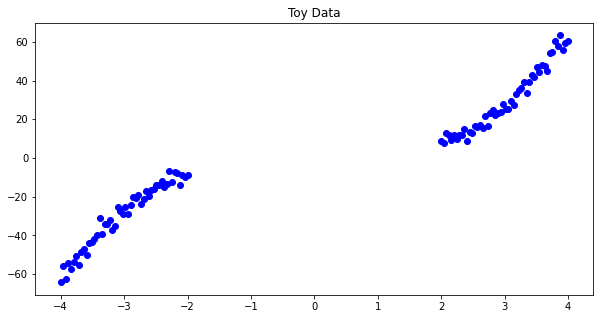

In [2]:
noise_var = 1.

x_train, y_train, x_test = generate_data(number_of_points=50, noise_variance=9)

# Plot toy data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='b')
ax.set_title('Toy Data')
plt.show()

### Plot Samples from GP Prior

In [3]:
amplitude = 1.
length_scale = 1.
length_scale_bounds = 'fixed'
noise_level_bounds = 'fixed'

gp_test = GP(amplitude, length_scale, length_scale_bounds, noise_var, noise_level_bounds)

In [4]:
prior_pred_samples = gp_test.get_prior_samples(x_test)

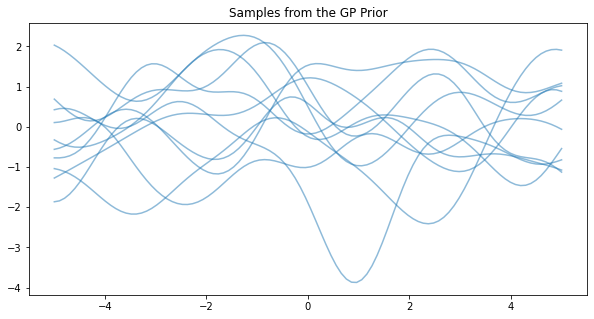

In [5]:
# Plot samples from the GP prior
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for sample in prior_pred_samples:
    ax.plot(x_test, sample, color='tab:blue', alpha=0.5)
ax.set_title('Samples from the GP Prior')
plt.show()

In [6]:
gp_test.fit(x_train, y_train)
y_pred_mean, y_pred_std = gp_test.predict(x_test)

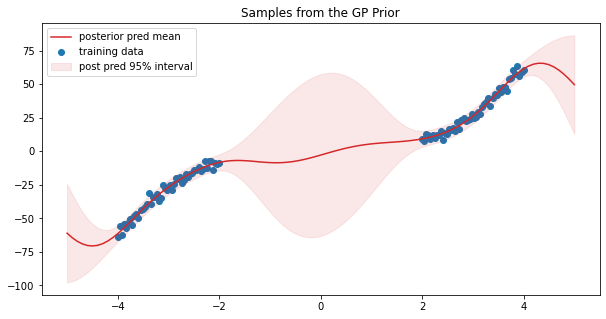

In [7]:
# Plot GP posterior predictive
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='tab:blue', label='training data')
ax.plot(x_test, y_pred_mean, color='tab:red', label='posterior pred mean')
ax.fill_between(x_test, y_pred_mean + 2 * y_pred_std, y_pred_mean - 2 * y_pred_std, color='tab:red', alpha=0.1, label='post pred 95% interval')
ax.set_title('Samples from the GP Prior')
ax.legend(loc='best')
plt.show()